In [1]:
%%capture
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import cmocean as cmo

In [2]:
diri_xls = '/media/carlos/DATA/MERH_TRABAJO/6_CD/'
fili_xsl = [os.path.join(diri_xls,x) for x in os.listdir(diri_xls) if x.endswith('xlsx')]

In [3]:
df = pd.read_excel(fili_xsl[1], names=['Dates','Q'])
df = df.sort_values(by=['Q'], ascending=False)
df['pos'] = np.arange(len(df['Q']))+1
df['prob'] = df['pos']*(1/(len(df['Q'])+1))
df2 = df.set_index(df['pos']-1)
df2.index.name = 'ID'

In [4]:
#----- Trying model---
def tmodel(P,a,b,c):
    Q = c+a*((1.0-P)**b)
    return Q

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [5]:
def plot_Qs(Q1, P, a, b, c):
    Q2 = tmodel(P,a,b,c)
    plt.style.use('ggplot')
    fig, ax = plt.subplots(ncols=2, figsize=(16,6), dpi=80)
    for n, axs in enumerate(ax.flat):
        if n==0:
            axs.plot(df2['prob'],Q1,df2['prob'],Q2)
        else:
            axs.scatter(Q1, Q2, s=30,marker='+',color='grey')
            add_identity(axs, color='grey', ls='--')

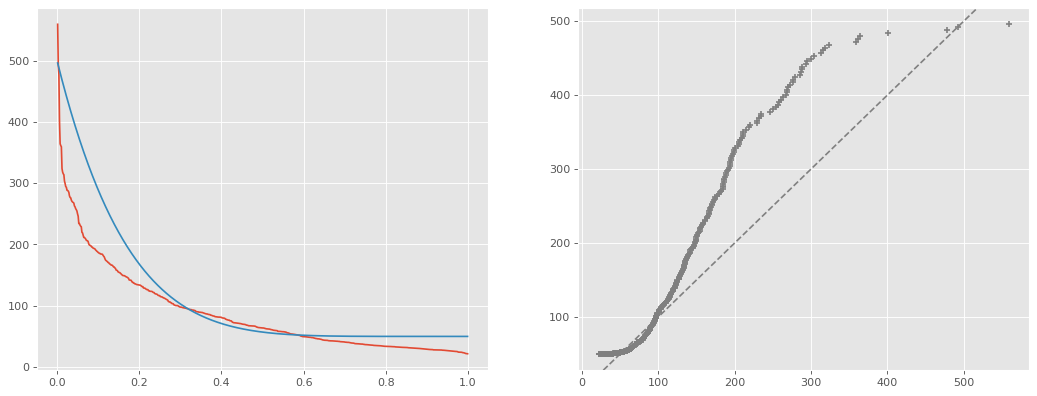

In [6]:
plot_Qs(df2['Q'],df2['prob'],450,6,50)

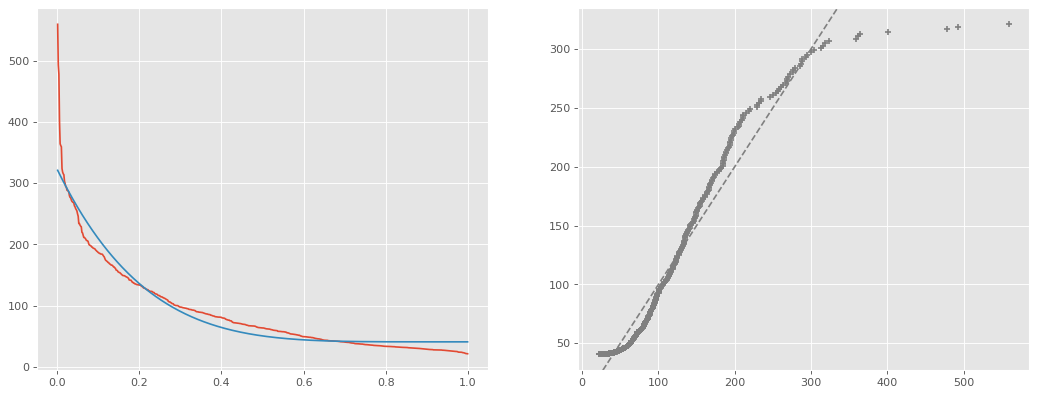

In [8]:
plot_Qs(df2['Q'],df2['prob'], 281.84, 4.87, 41.13)

### **Solver**